# Parameters

In [1]:
raw_data_path = '../Data_En/news.csv'
destination_folder = '../Data_En/pdata'

train_test_ratio = 0.10
train_valid_ratio = 0.80

first_n_words = 200

# Libraries

In [11]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# Preprocessing

In [3]:
def trim_string(x):

    x = x.split(maxsplit=first_n_words)
    x = ' '.join(x[:first_n_words])

    return x

In [4]:
# Read raw data
df_raw = pd.read_csv(raw_data_path)

# Prepare columns
df_raw['label'] = (df_raw['label'] == 'FAKE').astype('int')
df_raw['titletext'] = df_raw['title'] + ". " + df_raw['text']
df_raw = df_raw.reindex(columns=['label', 'title', 'text', 'titletext'])

# Drop rows with empty text
df_raw.drop( df_raw[df_raw.text.str.len() < 5].index, inplace=True)

# Trim text and titletext to first_n_words
df_raw['text'] = df_raw['text'].apply(trim_string)
df_raw['titletext'] = df_raw['titletext'].apply(trim_string) 

# Split according to label
df_real = df_raw[df_raw['label'] == 0]
df_fake = df_raw[df_raw['label'] == 1]

# Train-test split
df_real_full_train, df_real_test = train_test_split(df_real, train_size = train_test_ratio, random_state = 1)
df_fake_full_train, df_fake_test = train_test_split(df_fake, train_size = train_test_ratio, random_state = 1)

# Train-valid split
df_real_train, df_real_valid = train_test_split(df_real_full_train, train_size = train_valid_ratio, random_state = 1)
df_fake_train, df_fake_valid = train_test_split(df_fake_full_train, train_size = train_valid_ratio, random_state = 1)

# Concatenate splits of different labels
df_train = pd.concat([df_real_train, df_fake_train], ignore_index=True, sort=False)
df_valid = pd.concat([df_real_valid, df_fake_valid], ignore_index=True, sort=False)
df_test = pd.concat([df_real_test, df_fake_test], ignore_index=True, sort=False)

# Write preprocessed data
df_train.to_csv(destination_folder + '/train.csv', index=False)
df_valid.to_csv(destination_folder + '/valid.csv', index=False)
df_test.to_csv(destination_folder + '/test.csv', index=False)

In [5]:
df_train.head()

,label,title,text,titletext
0,0,Obamacare's unlikely No. 1 city,"Killing Obama administration rules, dismantlin...",Obamacare's unlikely No. 1 city. Killing Obama...
1,0,New York restores order for 2016 front-runners,Hillary Clinton and Donald Trump scored resoun...,New York restores order for 2016 front-runners...
2,0,These political scientists may have just disco...,There's a lot of disgust in America with polit...,These political scientists may have just disco...
3,0,"Hillary supporters: We're excited, too, but al...",Trump and Sanders get all the attention for th...,"Hillary supporters: We're excited, too, but al..."
4,0,Hung jury in Jodi Arias sentencing phase remov...,The jury in the Jodi Arias case tasked with de...,Hung jury in Jodi Arias sentencing phase remov...


# 数据分析

In [8]:
df_train.info

<bound method DataFrame.info of      label                                              title  \
0        0                    Obamacare's unlikely No. 1 city   
1        0     New York restores order for 2016 front-runners   
2        0  These political scientists may have just disco...   
3        0  Hillary supporters: We're excited, too, but al...   
4        0  Hung jury in Jodi Arias sentencing phase remov...   
..     ...                                                ...   
497      1  John Pilger: ‘The truth is… there was no one t...   
498      1  DEVELOPING: FBI Reopens Investigation into Cli...   
499      1                        Will Hillary Accept Defeat?   
500      1       How to Solve the Illegal Immigration Problem   
501      1  Top Aide to Hillary Clinton Urges the FBI to D...   

                                                  text  \
0    Killing Obama administration rules, dismantlin...   
1    Hillary Clinton and Donald Trump scored resoun...   
2    There's 

In [9]:
#缺失值

print(df_train[df_train.isnull().T.any()])
# 没有缺失值

Empty DataFrame
Columns: [label, title, text, titletext]
Index: []


In [6]:
#标签分布
from collections import Counter
Counter(list(df_train.label))

Counter({0: 253, 1: 249})

/home/joshua/miniconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/joshua/miniconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='word_count', ylabel='Density'>

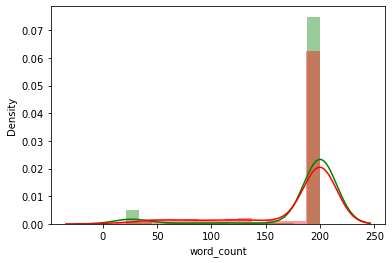

In [16]:
#长度分布
df_train['word_count'] = df_train['titletext'].apply(lambda x:len(str(x).split()))
sns.distplot(df_train.loc[~(df_train['label'] == 1)]['word_count'], label='0', color='green')
sns.distplot(df_train.loc[df_train['label'] == 1]['word_count'], label='1', color='red')
